# Implementation of K-Nearest Neighbor Algorithm

## Introduction
In this notebook, we will work with one of the most populer data sets in the world. It is [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris) which contains petal length, petal width, sepal length and sepal width of three different class of Iris species. These classes are named as Setosa, Versicolor and Virginica. We are going to build a machine learning model to determine plant's classes based on their features.

### How does K-NN work ?
The main idea behind the K-NN algorithm is quite straightforward. Let's consider the following figure. The datapoints of three labeled classes are shown with different colors and shapes. If we have a new data point, the algorithm calculates the distances of n-neighbors and decides the datapoint's class. You can set metric parameter to define which distance measure you would like to use such as Euclidean, Hamming, Manhattan, Minkowski distance. Its default Minkowski distance. In the following, example new data point will be assigned to green class since 2 of 3 closest neighbors are green.
<br>
<img src="img.png" width="240px" height="240px" align="left"/>



## 1. Importing data
Let's start with importing the libraries that we are going to use.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# I will keep the resulting plots
%matplotlib inline

# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

Now we can import our data into a DataFrame

In [2]:
data = pd.read_csv('../datasets/iris.data',header=None,names=['sepal_length(cm)','sepal_width(cm)','petal_length(cm)','petal_width(cm)','class'])

## 2. Explore the data
It is always good practice to do exploratory data analysis before building any models

In [3]:
# Display first five rows of the DataFrame
display(data.head())

# Get fundamental information about the DataFrame
display(data.info())

# We can also look at summary statistics
display(data.describe())

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sepal_length(cm)  150 non-null    float64
 1   sepal_width(cm)   150 non-null    float64
 2   petal_length(cm)  150 non-null    float64
 3   petal_width(cm)   150 non-null    float64
 4   class             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


As we can see above, we have 150 observations and no missing values. Let's visualize our data with a scatter plot

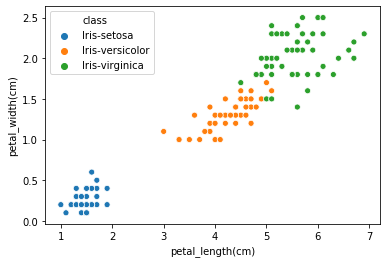

In [4]:
# Plot a scatter plot petal width vs petal length
sns.scatterplot(x='petal_length(cm)',y='petal_width(cm)',hue='class',data=data)
plt.show()

## 3. Build the model

Before we build our model, we have to split our data into training and test sets. To do this we are going to use train_test_split method from sci-kit

In [5]:
# Initialize the Label Encoder
le = LabelEncoder()

# Select the features and target
features = data.drop('class',axis=1)
target_encoded = le.fit_transform(data['class'].astype('category'))

# Split the data info training and test sets
X_train, X_test, y_train, y_test = train_test_split(features,target_encoded,test_size=0.3,random_state=34,stratify=target_encoded)

# Initialize the Standard Scaler
scaler = StandardScaler()

# Standardize the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now we can initialize our model and fit it.

In [6]:
# Initialize the classifier with 3 n_neighbors 
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Fit the model with training set
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

We've trained our model. Let's calculate the accuracy

In [7]:
# Predict from the test set
y_pred = knn.predict(X_test)
# Print the accuracy with accuracy_score function
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Or we can use KNeighborsClassifier's score attribute
print("Accuracy of test set: ", knn.score(X_test,y_test))

# Accuracy or training set
print("Accuracy of training set: ", knn.score(X_train,y_train))

Accuracy:  0.9555555555555556
Accuracy of test set:  0.9555555555555556
Accuracy of training set:  0.9809523809523809


## 4. Make Predictions
Our model is ready to predict!
Input features of an observation to see what happens.

In [9]:
i = list(map(float,input("Enter the sepal length, sepal width, petal length and pedal width seperated by space.").split()))
new_observation = pd.DataFrame({'sl':i[0],'sw':i[1],'pl':i[2],'pw':i[3]},index= [0])
if knn.predict(new_observation)[0]==0 :
    prediction = "Setosa"
elif knn.predict(new_observation)[0]==1:
    prediction = "Versicolor"
else:
    prediction = "Virginica"
print("It belongs to {} class".format(prediction))


Enter the sepal length, sepal width, petal length and pedal width seperated by space.1.3 1.2 3 4
It belongs to Virginica class


That's the end of this notebook. I hope it is helpful for understanding K-Nearest Neighbors algorithm 